In [1]:
%config IPCompleter.greedy=True

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [3]:
pytorch = pd.read_csv("pytorch_benchmark.txt", sep=';')
keras_vectorized = pd.read_csv("benchmark_keras_vectorized.txt", sep=';')
keras_map = pd.read_csv("benchmark_keras.txt", sep=';')

In [4]:
pytorch

,pop,iterations,function,gpu,s
0,10,10000,create_fn1,1,19.082525
1,10,10000,create_fn1,0,3.689649
2,10,10000,create_fn1numpy,1,20.103870
3,10,10000,create_fn1numpy,0,3.950488
4,10,10000,create_fn1unbind,1,53.315885
...,...,...,...,...,...
199,750000,10000,create_fn1axisnumpy,0,96810.185139
200,1000000,10000,create_fn1,1,346.400339
201,1000000,10000,create_fn1,0,6621.821079
202,1000000,10000,create_fn1numpy,1,2525.349158


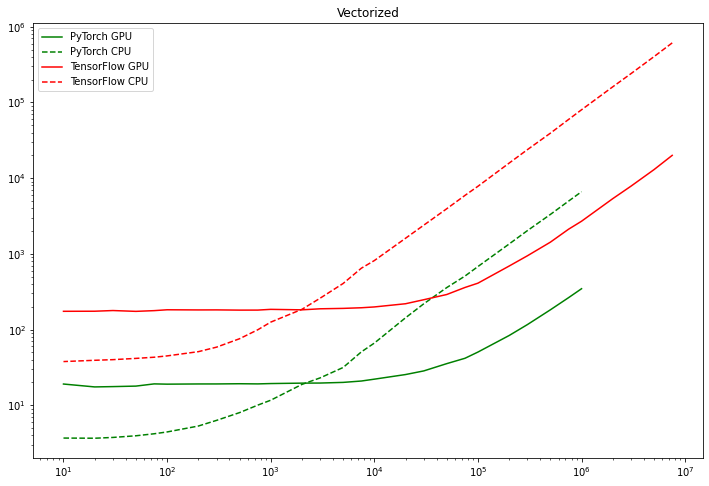

In [5]:
pytorch_gpu = (pytorch['function'] == "create_fn1") & (pytorch['gpu'] == 1)
pytorch_cpu = (pytorch['function'] == "create_fn1") & (pytorch['gpu'] == 0)
keras_gpu = keras_vectorized['gpu'] == 1
keras_cpu = keras_vectorized['gpu'] == 0

plt.figure(figsize=(12,8))
plt.title('Vectorized')
plt.plot(pytorch[pytorch_gpu]['pop'], pytorch[pytorch_gpu]['s'], label='PyTorch GPU', c='g')
plt.plot(pytorch[pytorch_cpu]['pop'], pytorch[pytorch_cpu]['s'], label='PyTorch CPU', c='g', ls='--')
plt.plot(keras_vectorized[keras_gpu]['pop'], keras_vectorized[keras_gpu]['s'], label='TensorFlow GPU', c='r')
plt.plot(keras_vectorized[keras_cpu]['pop'], keras_vectorized[keras_cpu]['s'], label='TensorFlow CPU', c='r', ls='--')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

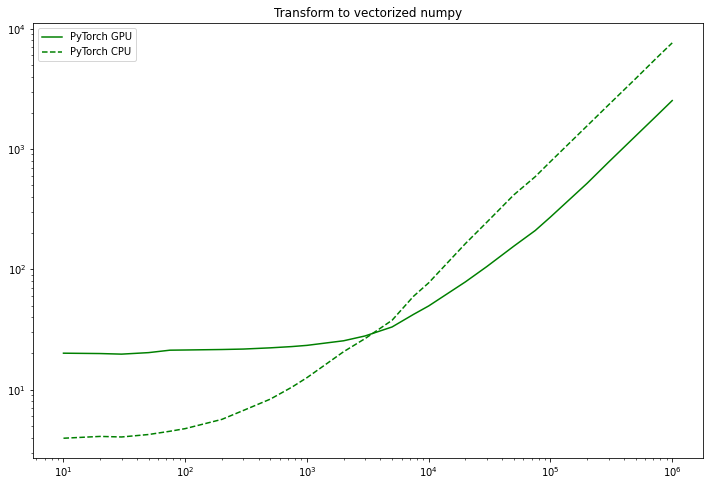

In [6]:
pytorch_gpu = (pytorch['function'] == "create_fn1numpy") & (pytorch['gpu'] == 1)
pytorch_cpu = (pytorch['function'] == "create_fn1numpy") & (pytorch['gpu'] == 0)

plt.figure(figsize=(12,8))
plt.title('Transform to vectorized numpy')
plt.plot(pytorch[pytorch_gpu]['pop'], pytorch[pytorch_gpu]['s'], label='PyTorch GPU', c='g')
plt.plot(pytorch[pytorch_cpu]['pop'], pytorch[pytorch_cpu]['s'], label='PyTorch CPU', c='g', ls='--')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

Není moc důležité. Jestliže lze vektorizovat numpy, potom by měl jít i vektorizovat přímo ve frameworku.

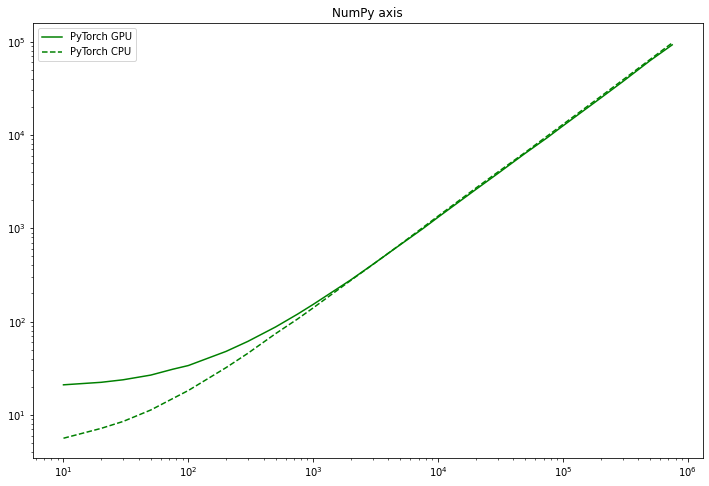

In [7]:
pytorch_gpu = (pytorch['function'] == "create_fn1axisnumpy") & (pytorch['gpu'] == 1)
pytorch_cpu = (pytorch['function'] == "create_fn1axisnumpy") & (pytorch['gpu'] == 0)

plt.figure(figsize=(12,8))
plt.title('NumPy axis')
plt.plot(pytorch[pytorch_gpu]['pop'], pytorch[pytorch_gpu]['s'], label='PyTorch GPU', c='g')
plt.plot(pytorch[pytorch_cpu]['pop'], pytorch[pytorch_cpu]['s'], label='PyTorch CPU', c='g', ls='--')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

Většinu času zabere vyhodnocení fitness a pro velké populace se efekt ztrácí.

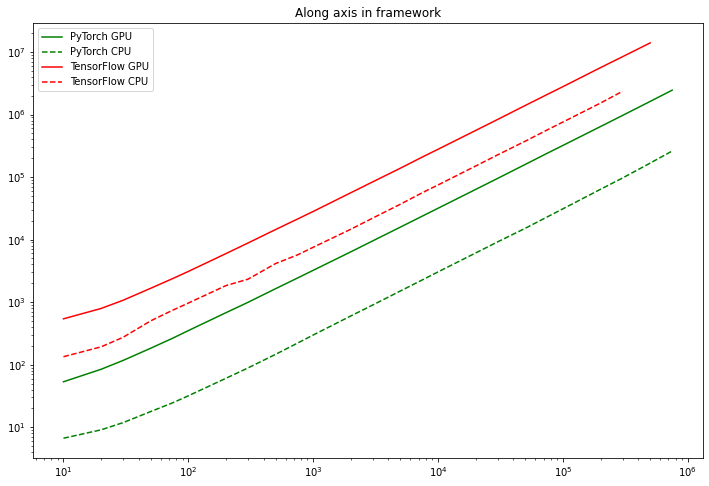

In [8]:
pytorch_gpu = (pytorch['function'] == "create_fn1unbind") & (pytorch['gpu'] == 1)
pytorch_cpu = (pytorch['function'] == "create_fn1unbind") & (pytorch['gpu'] == 0)
keras_gpu = keras_map['gpu'] == 1
keras_cpu = keras_map['gpu'] == 0

plt.figure(figsize=(12,8))
plt.title('Along axis in framework')
plt.plot(pytorch[pytorch_gpu]['pop'], pytorch[pytorch_gpu]['s'], label='PyTorch GPU', c='g')
plt.plot(pytorch[pytorch_cpu]['pop'], pytorch[pytorch_cpu]['s'], label='PyTorch CPU', c='g', ls='--')
plt.plot(keras_map[keras_gpu]['pop'], keras_map[keras_gpu]['s'], label='TensorFlow GPU', c='r')
plt.plot(keras_map[keras_cpu]['pop'], keras_map[keras_cpu]['s'], label='TensorFlow CPU', c='r', ls='--')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

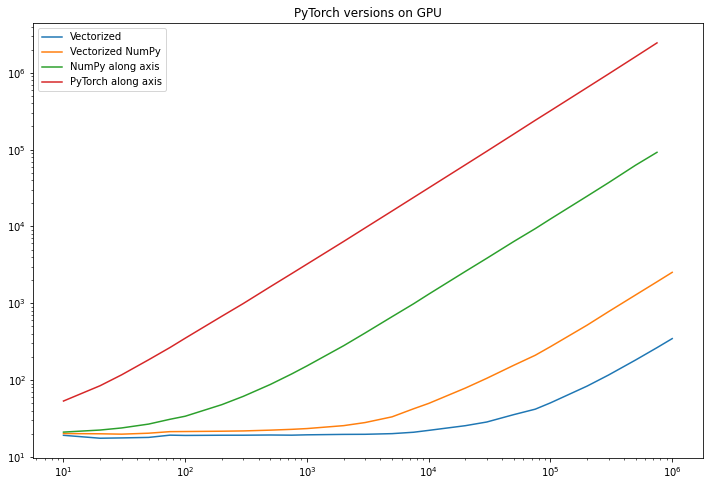

In [9]:
pytorch_1 = (pytorch['function'] == "create_fn1") & (pytorch['gpu'] == 1)
pytorch_2 = (pytorch['function'] == "create_fn1numpy") & (pytorch['gpu'] == 1)
pytorch_3 = (pytorch['function'] == "create_fn1axisnumpy") & (pytorch['gpu'] == 1)
pytorch_4 = (pytorch['function'] == "create_fn1unbind") & (pytorch['gpu'] == 1)

plt.figure(figsize=(12,8))
plt.title('PyTorch versions on GPU')
plt.plot(pytorch[pytorch_1]['pop'], pytorch[pytorch_1]['s'], label='Vectorized')
plt.plot(pytorch[pytorch_2]['pop'], pytorch[pytorch_2]['s'], label='Vectorized NumPy')
plt.plot(pytorch[pytorch_3]['pop'], pytorch[pytorch_3]['s'], label='NumPy along axis')
plt.plot(pytorch[pytorch_4]['pop'], pytorch[pytorch_4]['s'], label='PyTorch along axis')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

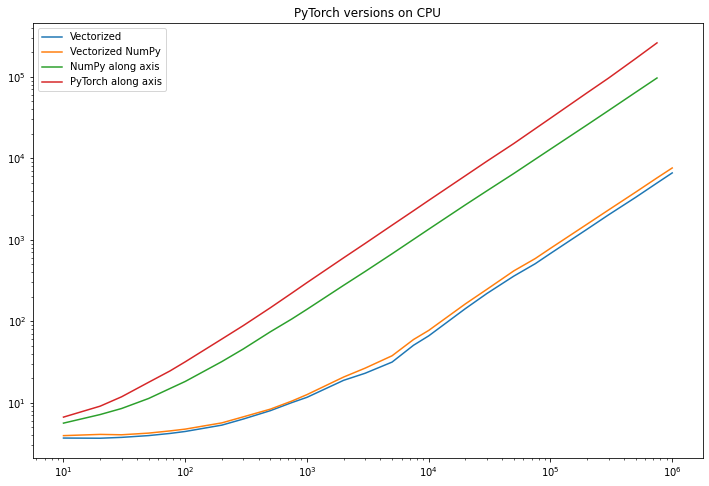

In [10]:
pytorch_1 = (pytorch['function'] == "create_fn1") & (pytorch['gpu'] == 0)
pytorch_2 = (pytorch['function'] == "create_fn1numpy") & (pytorch['gpu'] == 0)
pytorch_3 = (pytorch['function'] == "create_fn1axisnumpy") & (pytorch['gpu'] == 0)
pytorch_4 = (pytorch['function'] == "create_fn1unbind") & (pytorch['gpu'] == 0)

plt.figure(figsize=(12,8))
plt.title('PyTorch versions on CPU')
plt.plot(pytorch[pytorch_1]['pop'], pytorch[pytorch_1]['s'], label='Vectorized')
plt.plot(pytorch[pytorch_2]['pop'], pytorch[pytorch_2]['s'], label='Vectorized NumPy')
plt.plot(pytorch[pytorch_3]['pop'], pytorch[pytorch_3]['s'], label='NumPy along axis')
plt.plot(pytorch[pytorch_4]['pop'], pytorch[pytorch_4]['s'], label='PyTorch along axis')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()